In [132]:
# %pip install gdown

In [133]:
import gdown
import zipfile
import os

# Google Drive 공유 링크
url = "https://drive.google.com/file/d/1Gyk5STLl_ghJ81FS90NynAPOGc_ojSR0/view?usp=drive_link"

# gdown이 이해할 수 있는 ID 형식으로 변환
file_id = url.split("/d/")[1].split("/")[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# 저장할 파일 이름
output = "downloaded_file.zip"

# 구글 드라이브에서 다운로드
print("🔽 파일 다운로드 중...")
gdown.download(download_url, output, quiet=False)

# 압축 해제 (zip 파일일 경우)
extract_dir = "extracted_files"
os.makedirs(extract_dir, exist_ok=True)

print("📦 압축 해제 중...")
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"✅ 압축 해제 완료! 경로: {os.path.abspath(extract_dir)}")

🔽 파일 다운로드 중...


Downloading...
From: https://drive.google.com/uc?id=1Gyk5STLl_ghJ81FS90NynAPOGc_ojSR0
To: c:\Users\playdata2\Desktop\python_src\pandas-data-analysis\part7\downloaded_file.zip
100%|██████████| 16.8M/16.8M [00:00<00:00, 30.2MB/s]


📦 압축 해제 중...
✅ 압축 해제 완료! 경로: c:\Users\playdata2\Desktop\python_src\pandas-data-analysis\part7\extracted_files


In [134]:
import pandas as pd
import numpy as np
import re

train = pd.read_csv('./extracted_files/open/train.csv')
# 정수형 변환 함수
def extracted_and_convert_to_int(data):
    numbers = re.findall(r'\d+', str(data))
    return int(numbers[0]) if numbers else np.nan
train['가해운전자 연령'] = train['가해운전자 연령'].apply( extracted_and_convert_to_int )
train['피해운전자 연령'] = train['피해운전자 연령'].apply( extracted_and_convert_to_int )

In [135]:
# train.head()

In [136]:
# 데이터 기초 탐색 데이터의 크기, 구조, 결측치, 중복값, 기술통계량, 고유값
def wrangling(train_set):
    print('---shape---')
    display(train_set.shape)

    print('---info---')
    display(train_set.info())

    print('---nan---')
    display(train_set.isna().sum())

    print('---duplication---')
    display(train_set[train_set.duplicated()])

    print('---description---')
    display(train_set.describe())

    print('---unique---')
    display(train_set.nunique())

wrangling(train)

---shape---


(39609, 23)

---info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           39609 non-null  object 
 1   사고일시         39609 non-null  object 
 2   요일           39609 non-null  object 
 3   기상상태         39609 non-null  object 
 4   시군구          39609 non-null  object 
 5   도로형태         39609 non-null  object 
 6   노면상태         39609 non-null  object 
 7   사고유형         39609 non-null  object 
 8   사고유형 - 세부분류  39609 non-null  object 
 9   법규위반         39609 non-null  object 
 10  가해운전자 차종     39609 non-null  object 
 11  가해운전자 성별     39609 non-null  object 
 12  가해운전자 연령     38615 non-null  float64
 13  가해운전자 상해정도   39609 non-null  object 
 14  피해운전자 차종     38618 non-null  object 
 15  피해운전자 성별     38618 non-null  object 
 16  피해운전자 연령     38549 non-null  float64
 17  피해운전자 상해정도   38618 non-null  object 
 18  사망자수         39609 non-null  int64 

None

---nan---


ID                0
사고일시              0
요일                0
기상상태              0
시군구               0
도로형태              0
노면상태              0
사고유형              0
사고유형 - 세부분류       0
법규위반              0
가해운전자 차종          0
가해운전자 성별          0
가해운전자 연령        994
가해운전자 상해정도        0
피해운전자 차종        991
피해운전자 성별        991
피해운전자 연령       1060
피해운전자 상해정도      991
사망자수              0
중상자수              0
경상자수              0
부상자수              0
ECLO              0
dtype: int64

---duplication---


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO


---description---


,가해운전자 연령,피해운전자 연령,사망자수,중상자수,경상자수,부상자수,ECLO
count,38615.000000,38549.000000,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,47.906176,44.699655,0.007776,0.262365,1.070085,0.126865,4.726704
std,16.060277,16.968567,0.090109,0.500845,0.992034,0.394670,3.207206
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,31.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,50.000000,45.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,60.000000,58.000000,0.000000,0.000000,1.000000,0.000000,6.000000
max,98.000000,98.000000,2.000000,6.000000,22.000000,10.000000,74.000000


---unique---


ID             39609
사고일시           18057
요일                 7
기상상태               6
시군구              199
도로형태              11
노면상태               6
사고유형               3
사고유형 - 세부분류       14
법규위반              11
가해운전자 차종          12
가해운전자 성별           3
가해운전자 연령          87
가해운전자 상해정도         6
피해운전자 차종          13
피해운전자 성별           3
피해운전자 연령          95
피해운전자 상해정도         6
사망자수               3
중상자수               7
경상자수              18
부상자수               9
ECLO              46
dtype: int64

In [137]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

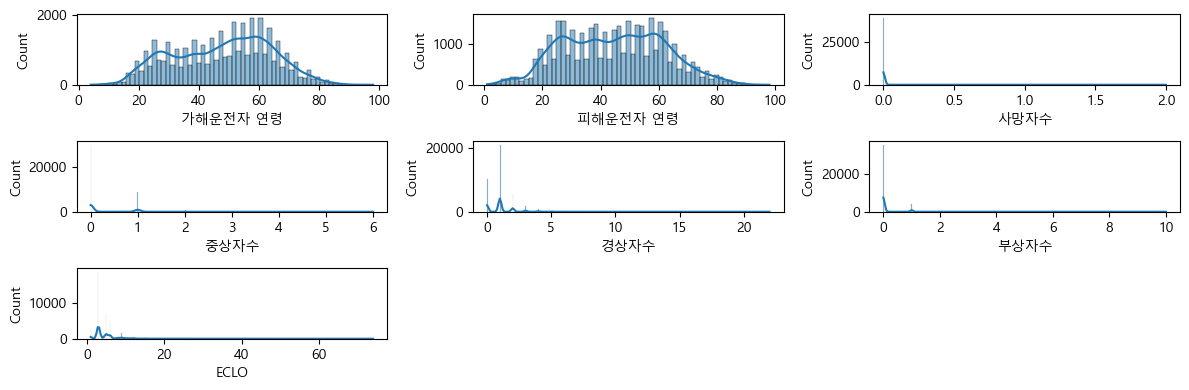

In [138]:
# 수치적 특성
#문자열 데이터가 아닌 칼럼만 모인 리스트 num_cols를 이용해서 각 컬럼별 분포를 확인
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = train.select_dtypes(exclude='object').columns.to_list()
plt.figure(figsize=(12,4))

for i,col in enumerate(num_cols):    
    plt.subplot(3,3,i+1)
    sns.histplot(train[col],kde=True )
plt.tight_layout()

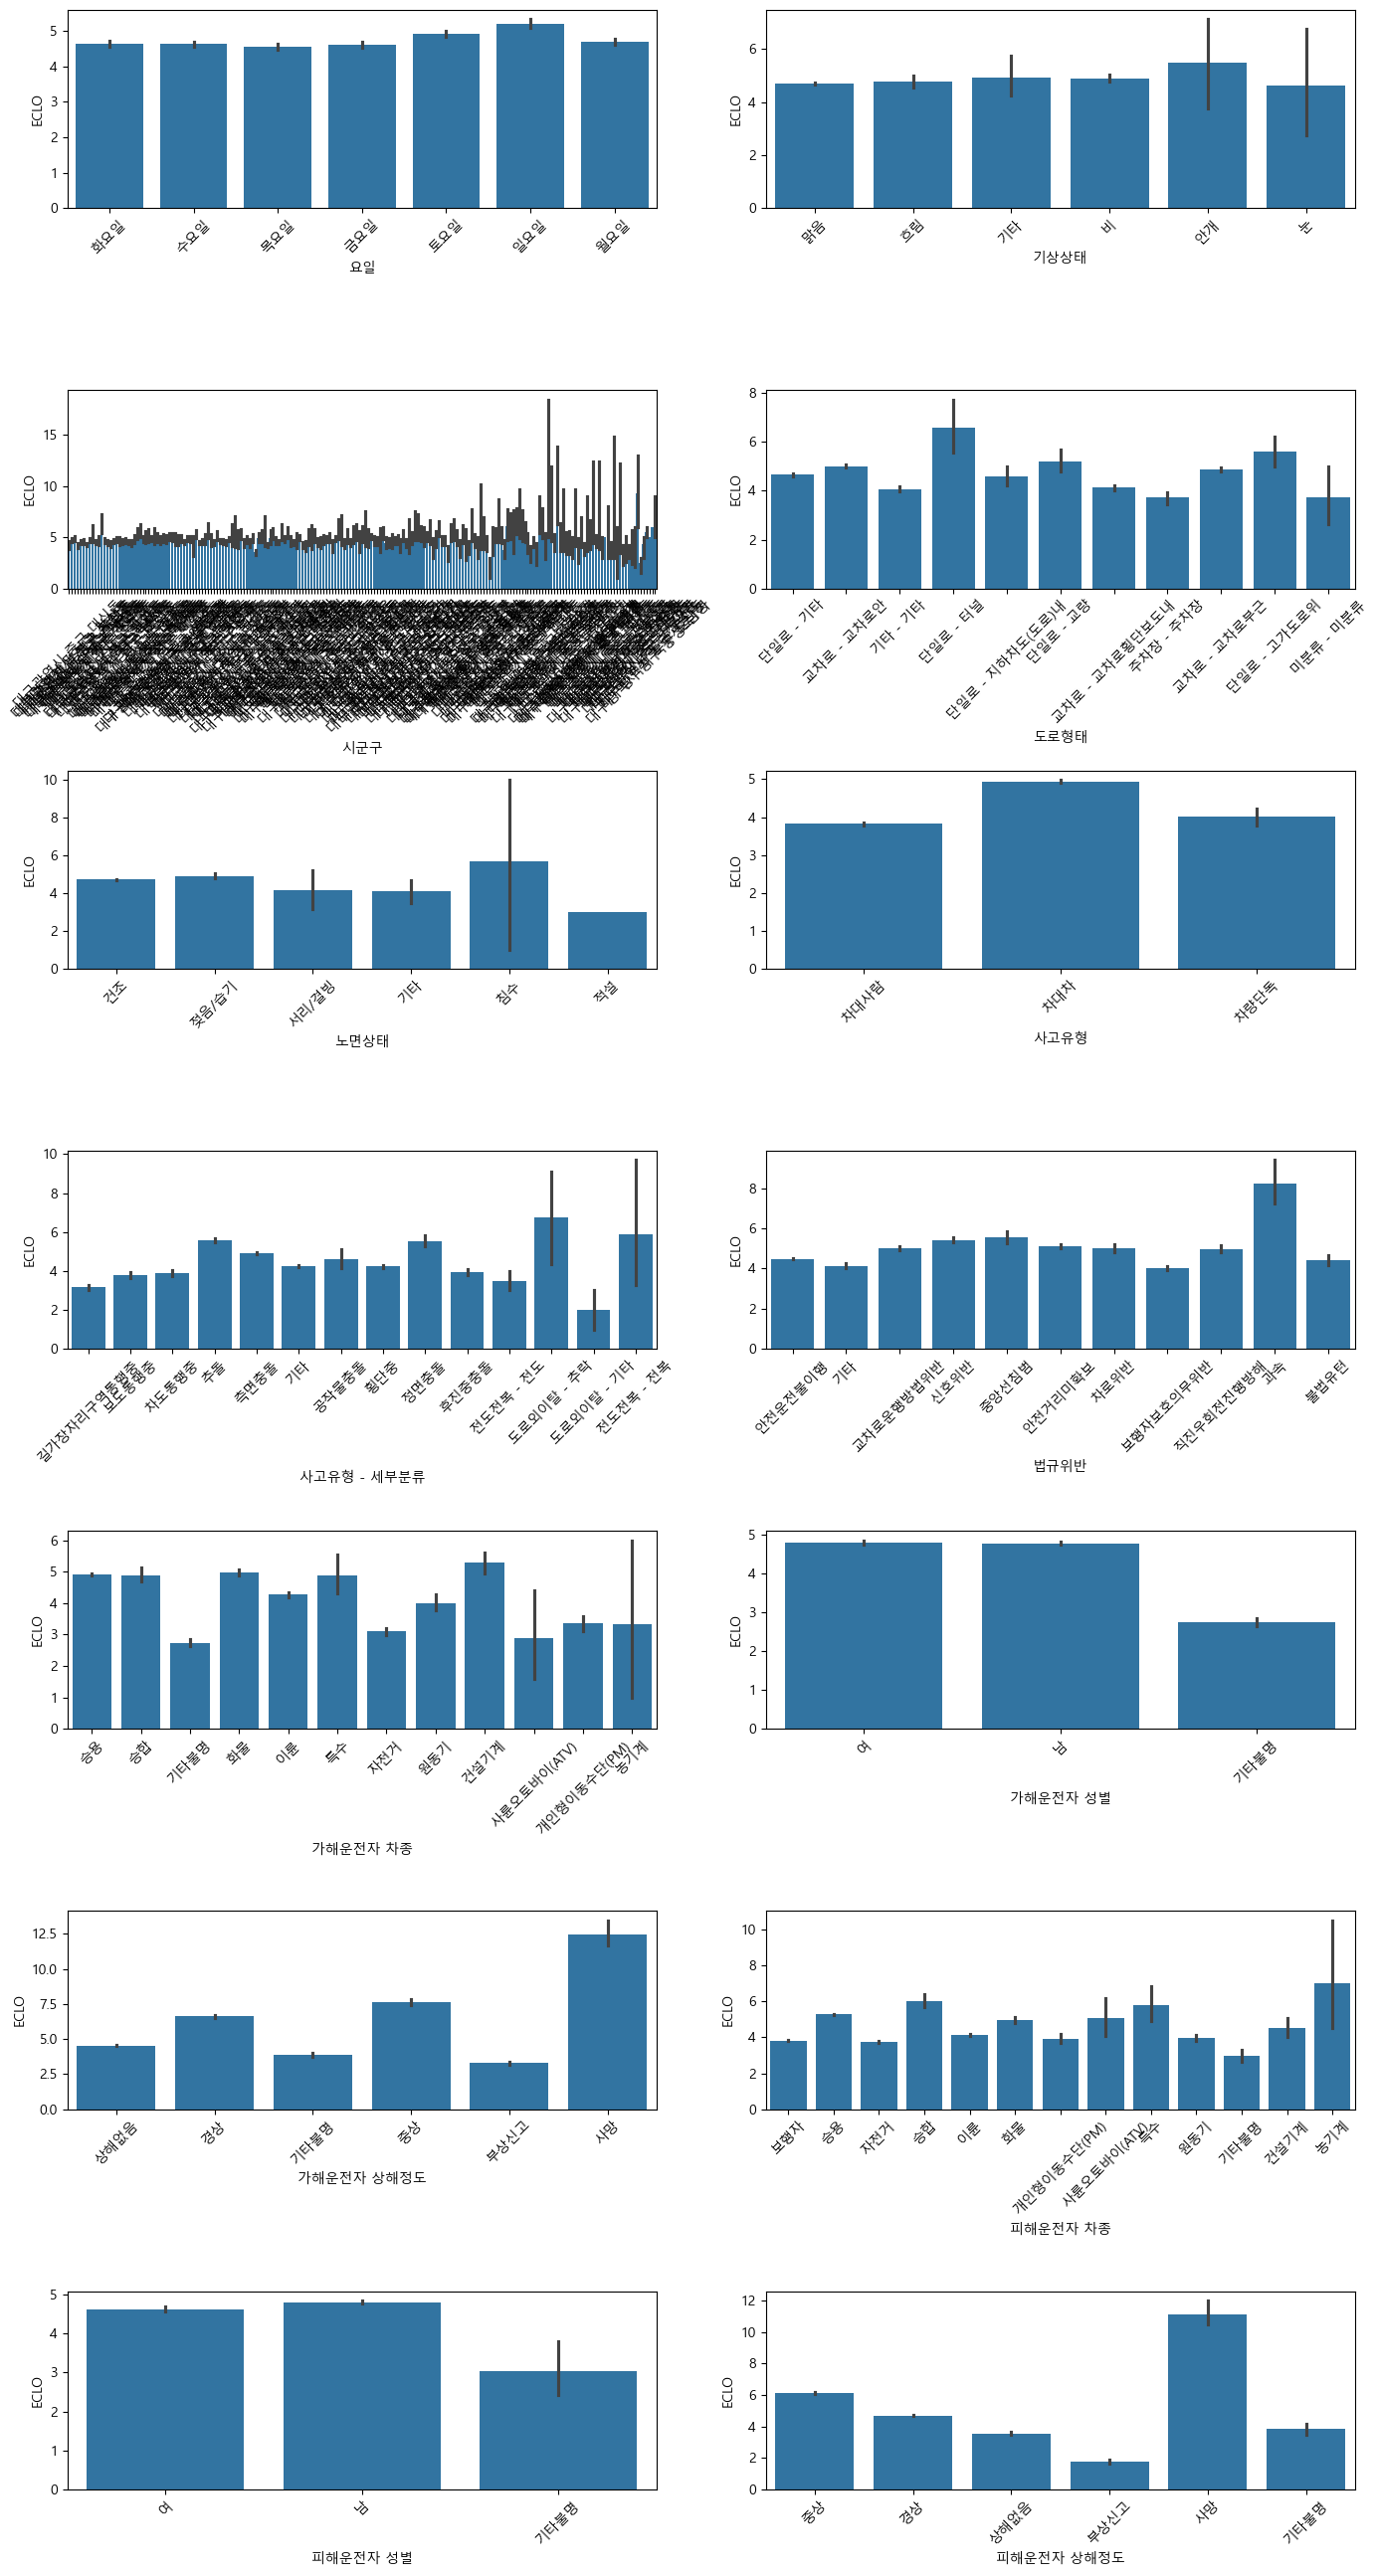

In [139]:
# 범주형 데이터 확인
plt.figure(figsize=(14,26))
category_cols = train.select_dtypes(include='object').columns[2:]
for i, col in enumerate(category_cols):
    plt.subplot(7,2,i+1)
    sns.barplot(data=train, x=col,y='ECLO')
    plt.xticks(rotation=45)
plt.tight_layout()    

In [140]:
# 사고지역(시 군구) 와 인명피해 심각도ELCO 관계탐색
# 시군구별로 ECLO값의 평균을 계산
num_by_region = train.groupby(['시군구'])['ECLO'].mean().sort_values(ascending=False)
print('top 10')
display(num_by_region[:10])
print('lower 10')
display(num_by_region[-10:])

top 10


시군구
대구광역시 북구 노곡동    10.333333
대구광역시 동구 덕곡동     9.875000
대구광역시 중구 대안동     9.333333
대구광역시 동구 내동      8.400000
대구광역시 중구 하서동     8.000000
대구광역시 동구 진인동     7.823529
대구광역시 동구 둔산동     7.571429
대구광역시 북구 조야동     7.120000
대구광역시 동구 송정동     7.071429
대구광역시 북구 도남동     7.000000
Name: ECLO, dtype: float64

lower 10


시군구
대구광역시 중구 서성로1가    3.666667
대구광역시 중구 삼덕동1가    3.511013
대구광역시 중구 향촌동      3.400000
대구광역시 중구 수창동      3.392857
대구광역시 중구 화전동      3.333333
대구광역시 중구 북성로1가    3.333333
대구광역시 중구 서성로2가    3.333333
대구광역시 동구 미대동      3.300000
대구광역시 중구 종로2가     2.500000
대구광역시 중구 동일동      2.333333
Name: ECLO, dtype: float64

In [141]:
# 사고지역(구 동) 와 인명피해 심각도ELCO 관계탐색
# 구별 상위10 동별 상위10 nlargest(10)
train['구'] = train['시군구'].str.split(" ", expand=True)[1]
train['동'] = train['시군구'].str.split(" ", expand=True)[2]

display( train.groupby(['구'])['ECLO'].mean().nlargest(10) )
display( train.groupby(['동'])['ECLO'].mean().nlargest(10) )

구
달성군    5.072280
동구     4.889534
서구     4.775680
수성구    4.727300
북구     4.687669
남구     4.623681
달서구    4.618441
중구     4.541610
Name: ECLO, dtype: float64

동
노곡동    10.333333
덕곡동     9.875000
대안동     9.333333
내동      8.400000
하서동     8.000000
진인동     7.823529
둔산동     7.571429
조야동     7.120000
송정동     7.071429
도남동     7.000000
Name: ECLO, dtype: float64

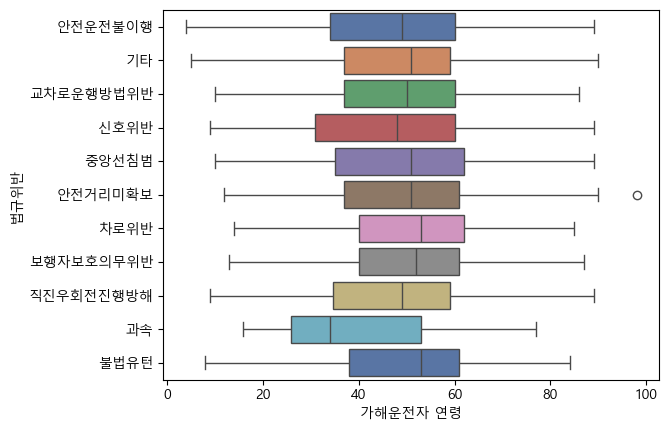

In [142]:
# 가해운전자의 연령과 법규위반 유형간의 관계
sns.boxplot(data=train, x='가해운전자 연령', y='법규위반', hue='법규위반', palette='deep')
plt.show()

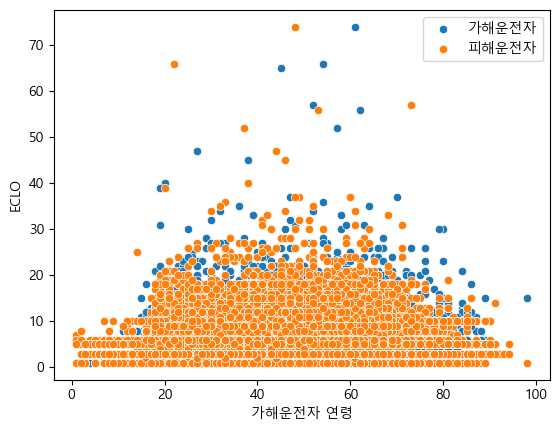

In [143]:
# 가해 운전자, 피해 운전자의 연령과 인명 피해 심각도(ECLO)
# 가설  가해운전자 또는 피해운전자의 연령이 높을수록 더 높은 ECLO --> X
sns.scatterplot(data=train, x='가해운전자 연령', y='ECLO', label='가해운전자')
sns.scatterplot(data=train, x='피해운전자 연령', y='ECLO', label='피해운전자')
plt.show()
# 나이와 ECLO는 관계가 없다

<Axes: xlabel='시간', ylabel='ECLO'>

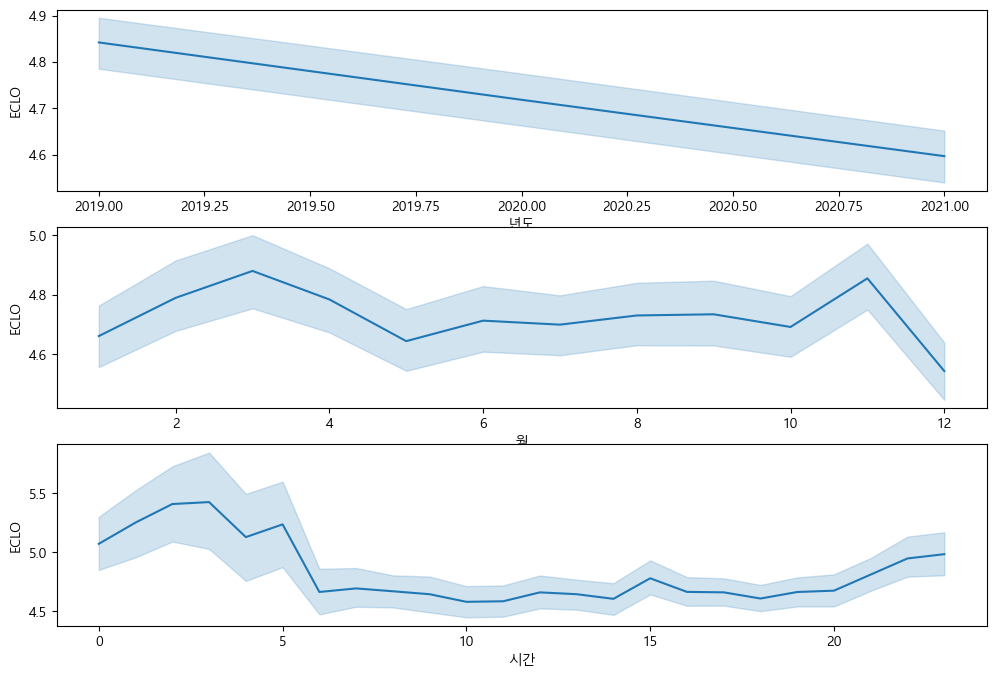

In [144]:
# 타겟변수 ECLO에 대한 연도 월 시간별 시계열 그래프 확인 분석
# 가설1  년도가 증가할수록 ECLO 높을것 같다
# 가설2  공휴일에는 ECLO 높을것 같다
# 가설3  출퇴근 시간에 ECLO 높을것 같다

# 사고일시  컬럼에서 년도 월 일 시간을 분류해서 추가
# 년도 line
# 월 bar
# 시간 line
# train['년도'] = train['사고일시'].apply(lambda x: x.split("-")[0])
# train['월'] = train['사고일시'].apply(lambda x: x.split("-")[1])
# train['시간'] = train['사고일시'].apply(lambda x: x.split(" ")[1])

train['년도'] = pd.to_datetime(train['사고일시']).dt.year
train['월'] = pd.to_datetime(train['사고일시']).dt.month
train['시간'] = pd.to_datetime(train['사고일시']).dt.hour

plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
sns.lineplot(data=train, x='년도', y='ECLO')
plt.subplot(3,1,2)
sns.lineplot(data=train, x='월', y='ECLO')
plt.subplot(3,1,3)
sns.lineplot(data=train, x='시간', y='ECLO')

c:\Users\playdata2\Desktop\python_src\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()


<Axes: >

c:\Users\playdata2\Desktop\python_src\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\playdata2\Desktop\python_src\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


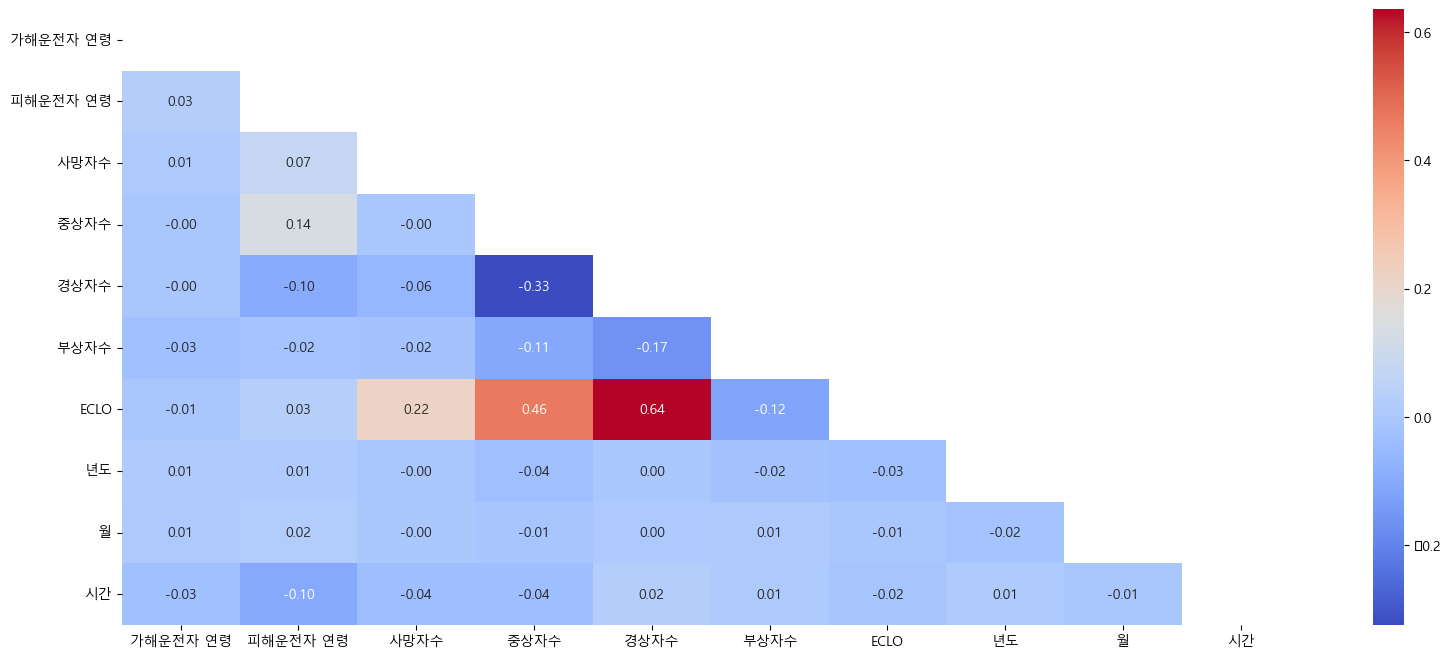

In [145]:
# 상관관계  heatmap
plt.figure(figsize=(19,8))
# 상관관계 행렬
corr = train.select_dtypes(exclude='object')[:-4].corr()

# 상삼각형 mask 만들기
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 출력
sns.heatmap(
    corr,
    mask=mask,        # 삼각형 제거
    annot=True,       # 수치 표시
    cmap='coolwarm',  # 색상 맵
    fmt='.2f'         # 소수점 둘째 자리까지 표시
)

#### 데이터 전처리 및 피쳐 엔지니어링

In [169]:
test = pd.read_csv('./extracted_files/open/test.csv')
train = pd.read_csv('./extracted_files/open/train.csv')
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

train[['년', '월', '일', '시간']] = train['사고일시'].str.extract(time_pattern).apply(pd.to_numeric)
train_df = train.drop(columns=['사고일시'])

train[['년', '월', '일', '시간']] = test['사고일시'].str.extract(time_pattern).apply(pd.to_numeric)
test_df = test.drop(columns=['사고일시'])

In [170]:
# 위치 특성 추출 : ECLO가 높은 시군구 가 있다는 것을 확인
local_pattern = r'(\S+) (\S+) (\S+)' # 서울시 강남구 대치동
train_df[['도시', '구', '동']] = train['시군구'].str.extract(local_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test['시군구'].str.extract(local_pattern)
test_df = test_df.drop(columns=['시군구'])

In [171]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_df['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_df['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])


In [172]:
pattern = r'(\d+)'
train_df['가해운전자 연령'] = train_df['가해운전자 연령'].str.extract(pattern).astype(float)
train_df['피해운전자 연령'] = train_df['피해운전자 연령'].str.extract(pattern).astype(float)


In [173]:
# 지역별 평균 연령 추출 및 데이터 병합
# 가해운전자 연령 과 피해운전자 연령의 평균을 지역별로 계산 -> 원본 데이터와 병합
train_df
age_mean = train_df[['도시','구','동','가해운전자 연령','피해운전자 연령']].groupby(['도시','구','동']).mean()
age_mean.columns = ['가해운전자 평균연령', '피해운전자 평균연령']
train_df = pd.merge(train_df, age_mean, how='left', on = ['도시','구','동'])
test_df = pd.merge(test_df, age_mean, how='left', on = ['도시','구','동'])
train_df['가해운전자 평균연령'].head()

0    52.714286
1    47.176383
2    47.008547
3    46.894089
4    49.426415
Name: 가해운전자 평균연령, dtype: float64

In [174]:
# 성별  남:1 여:0
train_df['가해운전자 성별'] = train_df['가해운전자 성별'].map({'남':1, '여':0})
train_df['피해운전자 성별'] = train_df['피해운전자 성별'].map({'남':1, '여':0})


In [175]:
# 지역별 평균 성별
gender_mean = train_df[['도시','구','동','가해운전자 성별','피해운전자 성별']].groupby(['도시','구','동']).mean()
gender_mean.columns = ['가해운전자 평균성별', '피해운전자 평균성별']
print(gender_mean)
train_df = pd.merge(train_df, gender_mean, how='left', on = ['도시','구','동'])
test_df = pd.merge(test_df, gender_mean, how='left', on = ['도시','구','동'])
train_df.head()

                 가해운전자 평균성별  피해운전자 평균성별
도시    구   동                            
대구광역시 남구  대명동      0.765156    0.731107
          봉덕동      0.748355    0.689145
          이천동      0.698864    0.723757
      달서구 갈산동      0.879630    0.853211
          감삼동      0.744395    0.732331
...                     ...         ...
      중구  태평로3가    0.820513    0.725000
          포정동      1.000000    0.653846
          하서동      0.800000    0.700000
          향촌동      1.000000    0.400000
          화전동      1.000000    1.000000

[199 rows x 2 columns]


,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,...,시간,도시,구,동,도로형태1,도로형태2,가해운전자 평균연령,피해운전자 평균연령,가해운전자 평균성별,피해운전자 평균성별
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,0.0,51.0,...,0,대구광역시,중구,대신동,단일로,기타,52.714286,48.015504,0.753968,0.604651
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,1.0,39.0,...,0,대구광역시,달서구,감삼동,단일로,기타,47.176383,42.906767,0.744395,0.732331
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,1.0,70.0,...,1,대구광역시,수성구,두산동,단일로,기타,47.008547,43.270134,0.747009,0.756711
3,ACCIDENT_00003,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,1.0,49.0,...,2,대구광역시,북구,복현동,단일로,기타,46.894089,42.943902,0.800493,0.714634
4,ACCIDENT_00004,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,1.0,30.0,...,4,대구광역시,동구,신암동,단일로,기타,49.426415,47.400254,0.779874,0.738247


In [176]:
# 주말특성  토,일 1  나머지는 0
train_df['주말'] = train_df['요일'].apply(lambda x: 1 if x in ['토요일', '일요일'] else 0 )
test_df['주말'] = test_df['요일'].apply(lambda x: 1 if x in ['토요일', '일요일'] else 0 )

#### 데이터 전처리 및 피쳐엔지니어링 심화

In [177]:
# 야간의 시인성 저하에 의해서 교통사고 발생확률을 예측하는데 반영
from glob import glob
csvs = glob('./extracted_files/**/*.*', recursive=True)
csvs

['./extracted_files\\open\\sample_submission.csv',
 './extracted_files\\open\\test.csv',
 './extracted_files\\open\\train.csv',
 './extracted_files\\open\\external_open\\countrywide_accident.csv',
 './extracted_files\\open\\external_open\\대구 CCTV 정보.csv',
 './extracted_files\\open\\external_open\\대구 보안등 정보.csv',
 './extracted_files\\open\\external_open\\대구 어린이 보호 구역 정보.csv',
 './extracted_files\\open\\external_open\\대구 주차장 정보.csv']

In [ ]:
# 지역별 사고 유형에 따른 차량 종류의 위험도 산출 및 데이터 병합
# 사고 유형과 차종별 사고 빈도는 지역별로 각기 다른 특성을 가진다 - ECLO의 주요 요인
# 파생변수 : 가해운전자 차종의 ECLO와 가해 운전자 차종 건수를 곱해 차종별 위험도 파생변수
ride_dangerous = train_df[['가해운전자 차종','ECLO']].groupby('가해운전자 차종').mean()
ride_dangerous.columns = ['ride_dangerous']

ride_count = train_df[['도시','구','가해운전자 차종']]
ride_count['count'] = 1
ride_count = ride_count.groupby(['도시','구','가해운전자 차종']).count().reset_index()
temp_1 = pd.merge(ride_count, ride_dangerous, how='left', on=['가해운전자 차종'])
temp_1['multiply'] = temp_1['count'] * temp_1['ride_dangerous']
temp_1 = temp_1.groupby(['도시','구']).sum().reset_index().drop(columns=['ride_dangerous'])
temp_1['ride_dangerous'] = temp_1['multiply'] / temp_1['count']
temp_1 = temp_1.drop(columns=['가해운전자 차종', 'count', 'multiply'])

train_df = pd.merge(train_df, temp_1, how='left', on=['도시', '구'])
test_df = pd.merge(test_df, temp_1, how='left', on=['도시', '구'])
test_df


C:\Users\playdata2\AppData\Local\Temp\ipykernel_12304\2721736347.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ride_count['count'] = 1


,ID,요일,기상상태,노면상태,사고유형,도시,구,동,도로형태1,도로형태2,가해운전자 평균연령,피해운전자 평균연령,가해운전자 평균성별,피해운전자 평균성별,주말,ride_dangerous
0,ACCIDENT_39609,토요일,맑음,건조,차대사람,대구광역시,수성구,상동,교차로,교차로안,46.719033,44.303951,0.728097,0.677812,1,4.757166
1,ACCIDENT_39610,토요일,맑음,건조,차대사람,대구광역시,수성구,지산동,단일로,기타,47.977273,46.119247,0.685950,0.658996,1,4.757166
2,ACCIDENT_39611,토요일,맑음,건조,차대차,대구광역시,수성구,수성동2가,교차로,교차로안,46.923077,45.321678,0.818182,0.664336,1,4.757166
3,ACCIDENT_39612,토요일,맑음,건조,차대차,대구광역시,수성구,신매동,단일로,기타,47.569061,43.263014,0.671271,0.654795,1,4.757166
4,ACCIDENT_39613,토요일,맑음,건조,차대차,대구광역시,달서구,감삼동,교차로,교차로안,47.176383,42.906767,0.744395,0.732331,1,4.745864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,ACCIDENT_50567,토요일,맑음,건조,차대차,대구광역시,남구,대명동,단일로,터널,47.900530,44.159930,0.765156,0.731107,1,4.713543
10959,ACCIDENT_50568,토요일,맑음,건조,차대차,대구광역시,수성구,시지동,단일로,기타,49.696970,45.190184,0.739394,0.644172,1,4.757166
10960,ACCIDENT_50569,토요일,맑음,건조,차대차,대구광역시,수성구,연호동,단일로,기타,46.990654,44.563107,0.747664,0.737864,1,4.757166
10961,ACCIDENT_50570,토요일,맑음,건조,차대차,대구광역시,수성구,범물동,교차로,교차로부근,48.508475,47.314655,0.665254,0.655172,1,4.757166
